In [3]:
import pandas as pd

df = pd.read_csv('train.csv')
print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

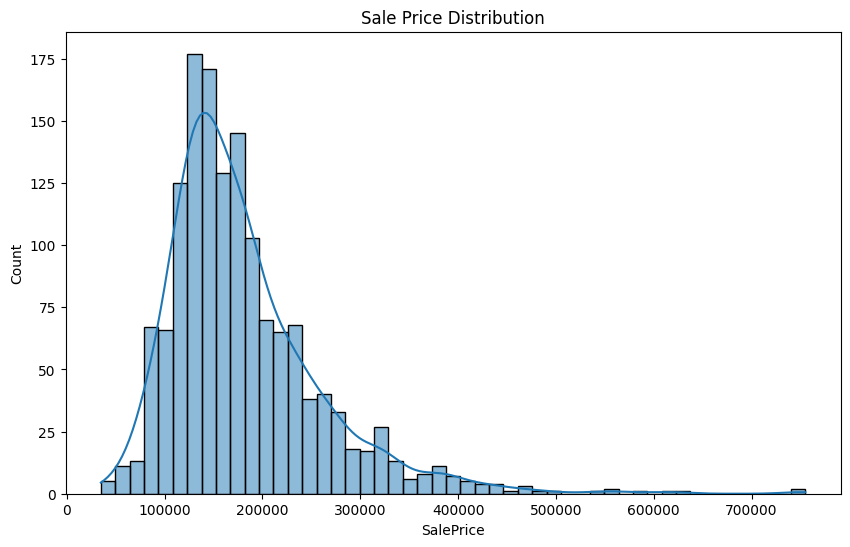

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Sale Price Distribution')
plt.show()


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['GrLivArea_scaled'] = scaler.fit_transform(df[['GrLivArea']])


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['SalePrice', 'Id'], axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Define features and target
x = df.drop(['SalePrice', 'Id'], axis=1)
y = df['SalePrice']

# One-hot encode categorical features
X = pd.get_dummies(x)

# Now you can split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Fill missing values (if any)
X = X.fillna(0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(['SalePrice', 'Id'], axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
import pandas as pd
import numpy as np  # <--- Add this import!
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Data
df = pd.read_csv('train.csv')

# 2. Drop 'Id' and separate features/target
X_raw = df.drop(['SalePrice', 'Id'], axis=1)
y = df['SalePrice']

# 3. One-hot encode categorical features
X = pd.get_dummies(X_raw)

# 4. Fill any missing values with 0 (for simplicity)
X = X.fillna(0)

# 5. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Ensure X_test has all columns of X_train (and vice versa)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# 7. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}, R2: {r2:.2f}')


RMSE: 65423.94, R2: 0.44


In [26]:
import streamlit as st
import numpy as np
import pandas as pd
# Load your model here (pickle joblib)
# Example: model = joblib.load('model.pkl')

st.title("House Price Prediction App")
GrLivArea = st.slider('Living Area (sq ft)', int(df['GrLivArea'].min()), int(df['GrLivArea'].max()))
OverallQual = st.slider('Overall Quality', 1, 10)
# ... add more features

# Example input for prediction
if st.button('Predict'):
    input_data = np.array([[GrLivArea, OverallQual]])  # Adjust as per your features
    prediction = model.predict(input_data)
    st.success(f'Estimated Price: ${prediction[0]:,.2f}')


2025-06-01 10:49:39.943 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 10:49:40.288 
  command:

    streamlit run c:\Users\Windows\Downloads\Bhai Work\ML Project\house-price-prediction\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-01 10:49:40.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 10:49:40.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 10:49:40.297 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 10:49:40.298 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 10:49:40.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mo

In [29]:
# If not already installed, uncomment and run the next line
# !pip install flask flask_cors joblib

from flask import Flask, request, jsonify
from flask_cors import CORS
import joblib
import numpy as np

# Create Flask app
app = Flask(__name__)
CORS(app)  # This allows requests from your HTML/JS on localhost

# Load your trained model
# Save your model after training:
#   import joblib
#   joblib.dump(model, 'house_price_model.pkl')
model = joblib.load('house_price_model.pkl')
# Define /predict endpoint
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    # Extract features from incoming JSON
    features = [
        data.get('GrLivArea', 0),
        data.get('OverallQual', 0),
        data.get('GarageCars', 0),
        data.get('TotalBsmtSF', 0)
    ]
    input_array = np.array([features])
    prediction = model.predict(input_array)[0]
    return jsonify({'prediction': float(prediction)})

if __name__ == "__main__":
    app.run(port=5000, debug=True)


FileNotFoundError: [Errno 2] No such file or directory: 'house_price_model.pkl'